In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/train.csv"))
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/COVID-19 Global Forecast/test.csv"))

In [3]:
print("The shape of training data is = {}".format(train.shape))
print("The shape of testing data is = {}".format(test.shape))

The shape of training data is = (23562, 6)
The shape of testing data is = (13158, 4)


In [4]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [0]:
train = train.set_index("Id")
test = test.set_index("ForecastId")

In [0]:
train.Province_State.fillna("", inplace = True)
test.Province_State.fillna("", inplace = True)

In [8]:
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [0]:
confirmed_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_us = train[train["Country_Region"] == "US"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_italy = train[train["Country_Region"] == "Italy"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_india = train[train["Country_Region"] == "India"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_france = train[train["Country_Region"] == "France"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_china = train[train["Country_Region"] == "China"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_taiwan = train[train["Country_Region"] == "Taiwan*"].groupby(["Date"]).Fatalities.sum()

confirmed_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_uk = train[train["Country_Region"] == "United Kingdom"].groupby(["Date"]).Fatalities.sum()

date = train["Date"].unique()

[]

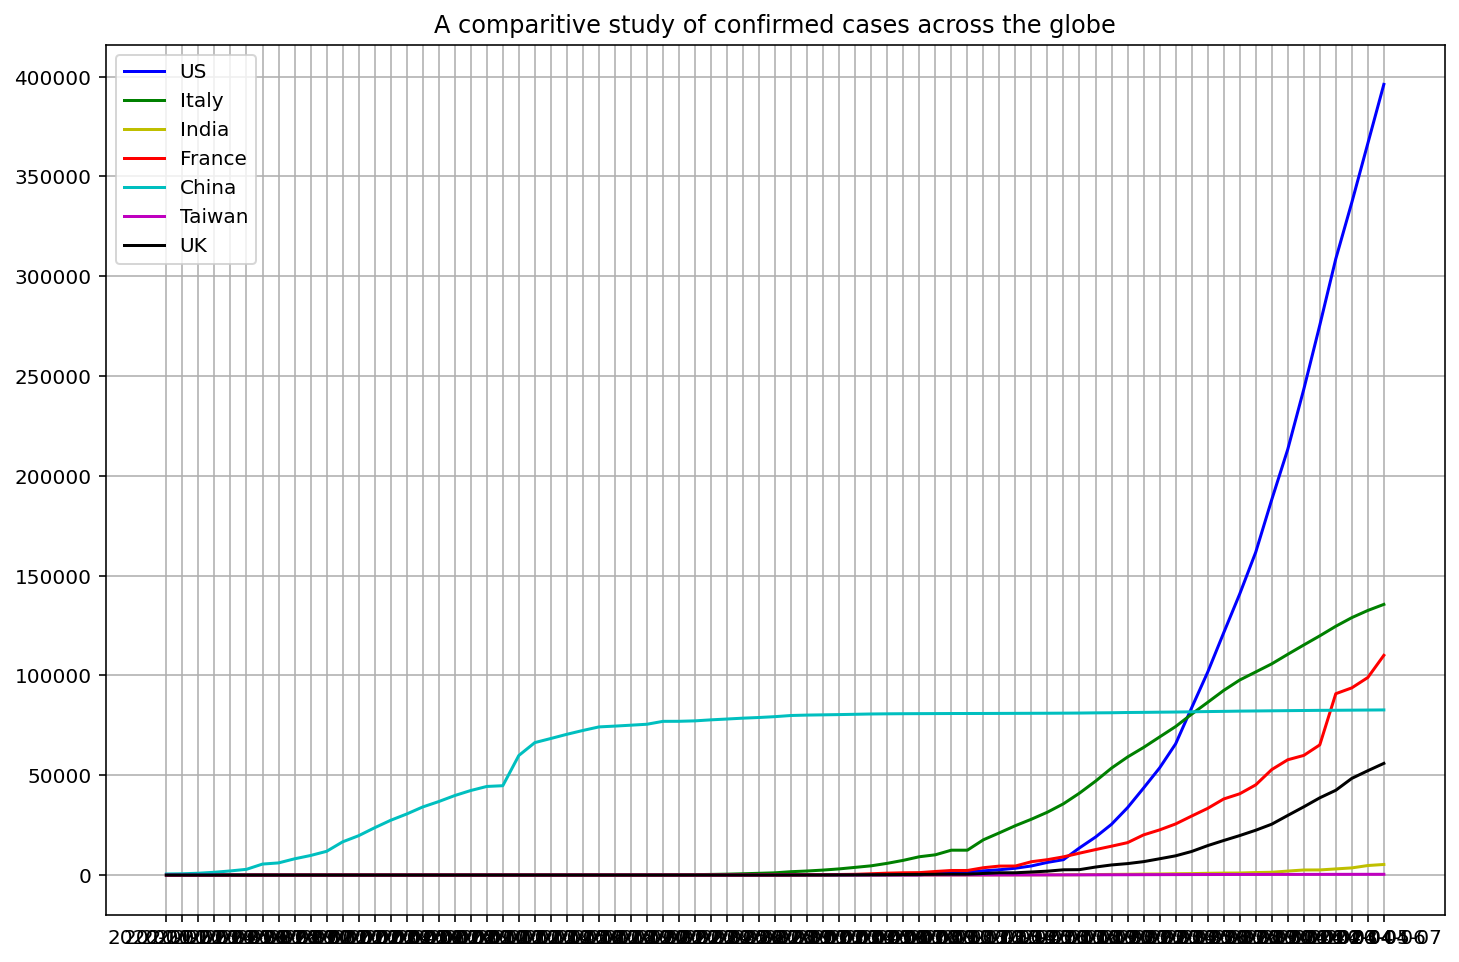

In [10]:
plt.figure(figsize = (12,8))
plt.plot(date, confirmed_cases_us, color = "b", label = "US")
plt.plot(date, confirmed_cases_italy, color = "g", label = "Italy")
plt.plot(date, confirmed_cases_india, color = "y", label = "India")
plt.plot(date, confirmed_cases_france, color = "r", label = "France")
plt.plot(date, confirmed_cases_china, color = "c", label = "China")
plt.plot(date, confirmed_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, confirmed_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of confirmed cases across the globe")
plt.legend()

plt.plot()

[]

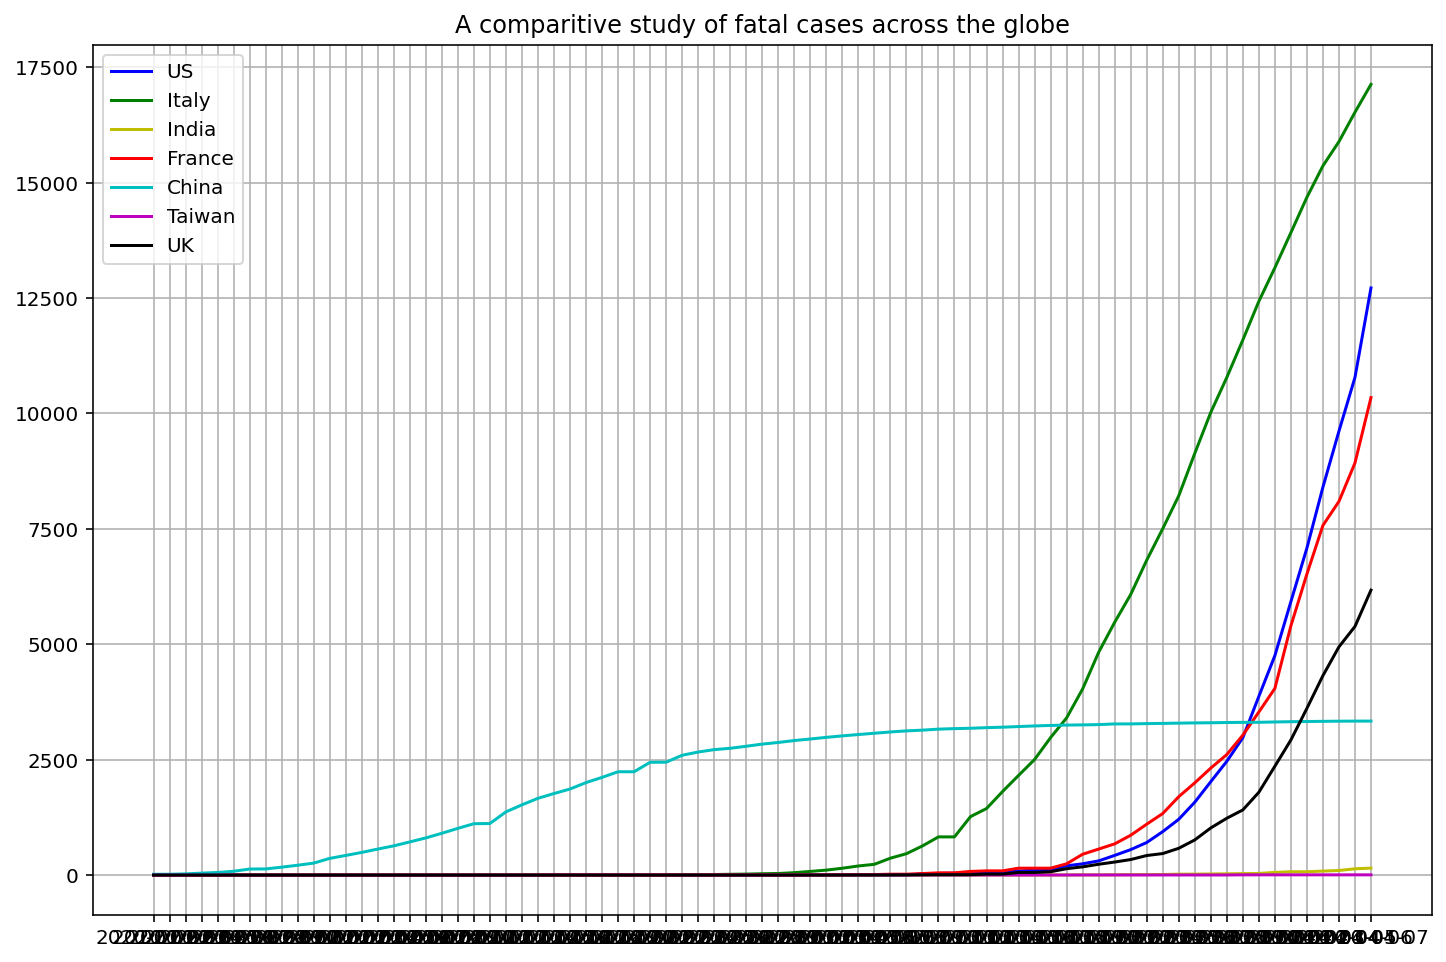

In [11]:
plt.figure(figsize = (12, 8))
plt.plot(date, fatal_cases_us, color = "b", label = "US")
plt.plot(date, fatal_cases_italy, color = "g", label = "Italy")
plt.plot(date, fatal_cases_india, color = "y", label = "India")
plt.plot(date, fatal_cases_france, color = "r", label = "France")
plt.plot(date, fatal_cases_china, color = "c", label = "China")
plt.plot(date, fatal_cases_taiwan, color = "m", label = "Taiwan")
plt.plot(date, fatal_cases_uk , color = "k", label = "UK")
plt.grid("both")
plt.title("A comparitive study of fatal cases across the globe")
plt.legend()

plt.plot()

In [12]:
train.head()

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Id,,,,,
1,,Afghanistan,2020-01-22,0.0,0.0
2,,Afghanistan,2020-01-23,0.0,0.0
3,,Afghanistan,2020-01-24,0.0,0.0
4,,Afghanistan,2020-01-25,0.0,0.0
5,,Afghanistan,2020-01-26,0.0,0.0


In [0]:
def country_wise_extraction(input_dataframe , country_name):
  df = input_dataframe[input_dataframe["Country_Region"] == country_name]  
  df.drop(["Province_State", "Country_Region"], axis = 1, inplace = True) 
  return df

def extract_from_date(df):
  day = []
  month = []
  for tstamp in df['Date']:
    t = tstamp.to_pydatetime()
    day.append(t.day)
    month.append(t.month)
  return day, month

In [14]:
train_india = country_wise_extraction(train, "India")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
train_india["Date"] = pd.to_datetime(train_india["Date"], format = "%Y-%m-%d")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
day, month = extract_from_date(train_india) 
train_india['Day'] = day
train_india['Month'] = month
train_india.drop(["Date"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [17]:
train_india.head()

,ConfirmedCases,Fatalities,Day,Month
Id,,,,
14874,0.0,0.0,22,1
14875,0.0,0.0,23,1
14876,0.0,0.0,24,1
14877,0.0,0.0,25,1
14878,0.0,0.0,26,1


In [18]:
train_size = int(len(train_india) * 0.9)
val_size = len(train_india) - train_size
print("Training size = {}".format(train_size))
print("Validation size = {}".format(val_size))

Training size = 69
Validation size = 8


In [19]:
training_data = train_india.iloc[0:train_size]
validation_data = train_india.iloc[train_size : len(train_india)]

print("Training data size = {}".format(len(training_data)))
print("Validation data size = {}".format(len(validation_data)))

Training data size = 69
Validation data size = 8


In [0]:
train_x = training_data[["Day", "Month"]]
train_y = training_data[["ConfirmedCases", "Fatalities"]]

valid_x = validation_data[["Day", "Month"]]
valid_y = validation_data[["ConfirmedCases", "Fatalities"]]

train_y_c = train_y[["ConfirmedCases"]]
train_y_f = train_y[["Fatalities"]]
valid_y_c = valid_y[["ConfirmedCases"]]
valid_y_f = valid_y[["Fatalities"]]

In [21]:
train_x.head()

,Day,Month
Id,,
14874,22,1
14875,23,1
14876,24,1
14877,25,1
14878,26,1


In [22]:
scaler = MinMaxScaler(feature_range = (0,1)) 
train_x[["Day" , "Month"]] = scaler.fit_transform(train_x[["Day" , "Month"]])
valid_x[["Day", "Month"]] = scaler.fit_transform(valid_x[["Day", "Month"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [0]:
def create_dataset(x, y_c, y_f, time_steps):
  xs , ys_c, ys_f = [] , [], [] 
  for i in range(len(x) - time_steps):
    temp_x = x.iloc[i : (i + time_steps)].values
    temp_yc = y_c.iloc[i : (i + time_steps)].values
    temp_yf = y_f.iloc[i : (i + time_steps)].values 
    xs.append(temp_x)
    ys_c.append(temp_yc)
    ys_f.append(temp_yf)
  return np.array(xs) , np.array(ys_c), np.array(ys_f) 

In [24]:
time_steps = 2 
train_x , train_yc, train_yf = create_dataset(train_x, train_y_c, train_y_f, time_steps)
valid_x , valid_yc, valid_yf = create_dataset(valid_x, valid_y_c, valid_y_f, time_steps)
print(train_x.shape, train_yc.shape, train_yf.shape)
print(valid_x.shape, valid_yc.shape, valid_yf.shape)

(67, 2, 2) (67, 2, 1) (67, 2, 1)
(6, 2, 2) (6, 2, 1) (6, 2, 1)


In [0]:
model_cc = tf.keras.Sequential()
model_cc.add(tf.keras.layers.LSTM(units = 3, return_sequences = True, input_shape = (train_x.shape[1], train_x.shape[2])))
model_cc.add(tf.keras.layers.LSTM(units = 3, return_sequences = True))
model_cc.add(tf.keras.layers.LSTM(units = 3, return_sequences = False))
model_cc.add(tf.keras.layers.Dense(units = 1)) 

In [0]:
model_cc.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = tf.keras.losses.MeanSquaredLogarithmicError(), metrics = ["accuracy"])
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor= "val_loss" , patience = 7, verbose = 1, factor = 0.6, min_lr = 0.0001),
             tf.keras.callbacks.EarlyStopping(monitor = "val_loss" , patience = 7),
             tf.keras.callbacks.ModelCheckpoint(filepath = "best_model.h5", monitor = "val_loss", save_best_only= True)]

In [36]:
with tf.device("/device:GPU:0"):
  history = model_cc.fit(train_x , train_yc, epochs = 1000, batch_size = 16, shuffle = False, validation_data = (valid_x , valid_yc), 
                         verbose = 1, callback = callbacks) 

Epoch 1/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4805 - accuracy: 0.0448 - val_loss: 28.1015 - val_accuracy: 0.0000e+00
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4775 - accuracy: 0.0448 - val_loss: 28.0785 - val_accuracy: 0.0000e+00
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4746 - accuracy: 0.0448 - val_loss: 28.0556 - val_accuracy: 0.0000e+00
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4716 - accuracy: 0.0448 - val_loss: 28.0329 - val_accuracy: 0.0000e+00
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4687 - accuracy: 0.0448 - val_loss: 28.0103 - val_accuracy: 0.0000e+00
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4657 - accuracy: 0.0448 - val_loss: 27.9879 - val_accuracy: 0.0000e+00
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 6.4628 - accuracy: 0.0448 - val_loss: 27.9657 - val

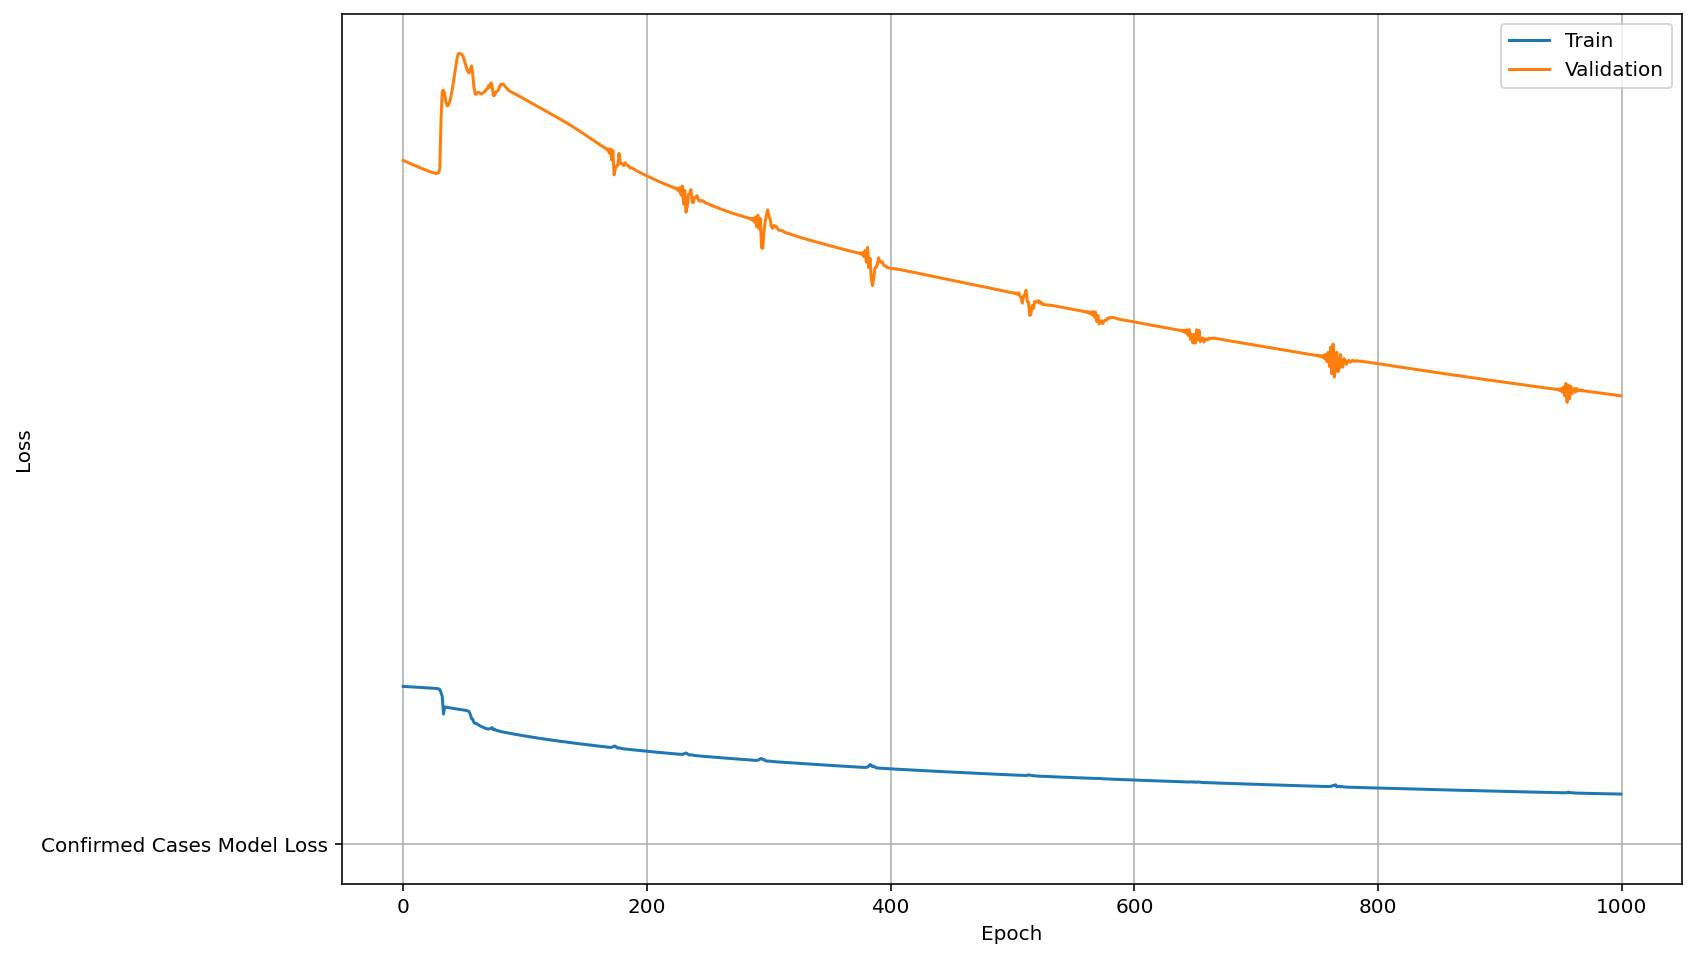

In [37]:
plt.figure(figsize = (12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot("Confirmed Cases Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train" , "Validation"])
plt.grid("both")
plt.show()